This notebook uses several different models to predict popularity using log(likes)/views as popularity calculation. Additionally, this notebook uses detected emotions as a predictor.

In [173]:
import numpy as np
import pandas as pd
import json
import ast
from collections import OrderedDict
from datetime import datetime
import matplotlib.pyplot as plt

from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MultiLabelBinarizer

In [174]:
df = pd.read_csv("..\data\\final_data_for_svr.csv")
df.head()

,Unnamed: 0,_id,duration,likes,speakers,subtitle_languages,summary,topics,title,transcript,...,Curious,Informed,Impressed,Hopeful,Amused,Fulfilled,Surprised,tb_score,vd_score,Unnamed: 0.1
0,0,21,992,17000,"[{'name': 'Mena Trott', 'occupation': 'Blogger...","[{'name': 'English', 'code': 'en'}, {'name': '...","The founding mother of the blog revolution, Mo...","[{'id': '4', 'name': 'culture'}, {'id': '13', ...",Meet the founder of the blog revolution,"Over the past couple of days, as I've been pre...",...,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.133855,0.9996,0
1,1,1,957,110000,"[{'name': 'Al Gore', 'occupation': 'Climate ad...","[{'name': 'Greek', 'code': 'el'}, {'name': 'Gu...",With the same humor and humanity he exuded in ...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Averting the climate crisis,"Thank you so much, Chris. And it's truly a gre...",...,0.75,0.00,0.0,0.0,0.0,0.0,0.0,0.131762,0.9997,1
2,2,7,1266,60000,"[{'name': 'David Pogue', 'occupation': 'Techno...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",New York Times columnist David Pogue takes aim...,"[{'id': '10', 'name': 'technology'}, {'id': '3...",Simplicity sells,"(Music: ""The Sound of Silence,"" Simon &amp; Ga...",...,0.90,0.80,0.6,0.0,0.0,0.0,0.0,0.155493,0.9999,2
3,3,47,1126,80000,"[{'name': 'David Deutsch', 'occupation': 'Phys...","[{'name': 'Greek', 'code': 'el'}, {'name': 'En...",Legendary scientist David Deutsch puts theoret...,"[{'id': '3', 'name': 'climate change'}, {'id':...",Chemical scum that dream of distant quasars,We've been told to go out on a limb and say so...,...,0.00,0.65,0.0,0.0,0.0,0.0,0.0,0.066814,0.9990,3
4,4,55,1524,14000,"[{'name': 'Jehane Noujaim', 'occupation': 'Fil...","[{'name': 'English', 'code': 'en'}, {'name': '...",Jehane Noujaim unveils her 2006 TED Prize wish...,"[{'id': '4', 'name': 'culture'}, {'id': '6', '...",My wish: A global day of film,I can't help but this wish: to think about whe...,...,0.75,0.00,0.0,0.0,0.0,0.0,0.0,0.127882,0.9995,4


In [175]:
# take the log of likes to calculate popularity
df['likes_log'] = np.log(df['likes'])
df['popularity'] = (df['likes_log']/df['views']) * 100

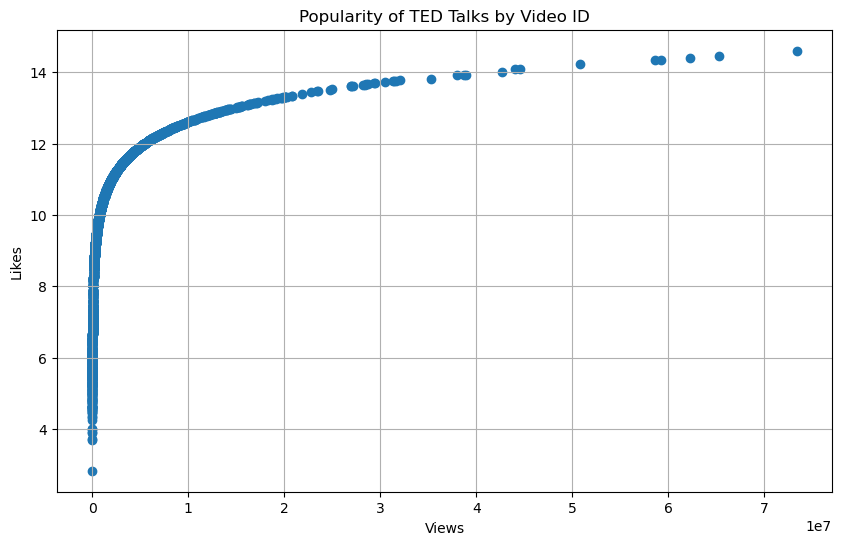

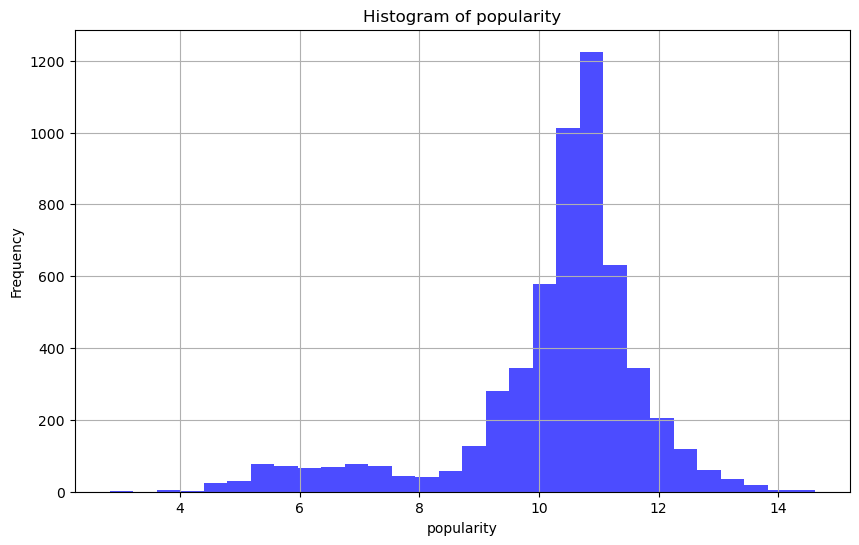

In [176]:
# scatter plot of likes vs views
plt.figure(figsize=(10, 6))
plt.scatter(df['views'], df['likes_log'], marker='o')
plt.title('Popularity of TED Talks by Video ID')
plt.xlabel('Views')
plt.ylabel('Likes')
plt.grid(True)
plt.show()
# Plot histogram
plt.figure(figsize=(10, 6))
plt.hist(df['likes_log'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of popularity')
plt.xlabel('popularity')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [177]:
df.columns.tolist()

['Unnamed: 0',
 '_id',
 'duration',
 'likes',
 'speakers',
 'subtitle_languages',
 'summary',
 'topics',
 'title',
 'transcript',
 'views',
 'recorded_date',
 'published_date',
 'speakers_list',
 'sl_list',
 'topics_list',
 'processed_transcript',
 'Inspired',
 'Moved',
 'Sad',
 'Curious',
 'Informed',
 'Impressed',
 'Hopeful',
 'Amused',
 'Fulfilled',
 'Surprised',
 'tb_score',
 'vd_score',
 'Unnamed: 0.1',
 'likes_log',
 'popularity']

In [180]:
X = df.drop(['_id', 'likes_log', 'likes', 'published_date', 'recorded_date', 'speakers', 'subtitle_languages', 'summary', 'title', 'topics', 'transcript','views', 'speakers_list','sl_list','topics_list', 'processed_transcript', 'popularity'], axis=1)
#[['duration', 'tb_score', 'vd_score', 'topics_list']]
y = df['popularity']

In [181]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [182]:
from sklearn import linear_model
reg = linear_model.LinearRegression().fit(X_train_scaled, y_train)
reg.score(X_train_scaled, y_train)

0.31504140060423036

In [184]:
y_pred_linear = reg.predict(X_test_scaled)
mse_linear = np.mean((y_pred_linear - y_test) ** 2)
mse_linear

0.00016466067400159806

In [185]:
print(y_pred_linear)

[ 3.54614744e-02 -3.77016840e-03  2.98686306e-03 ...  2.01644616e-05
 -1.99733278e-03 -3.87784204e-03]


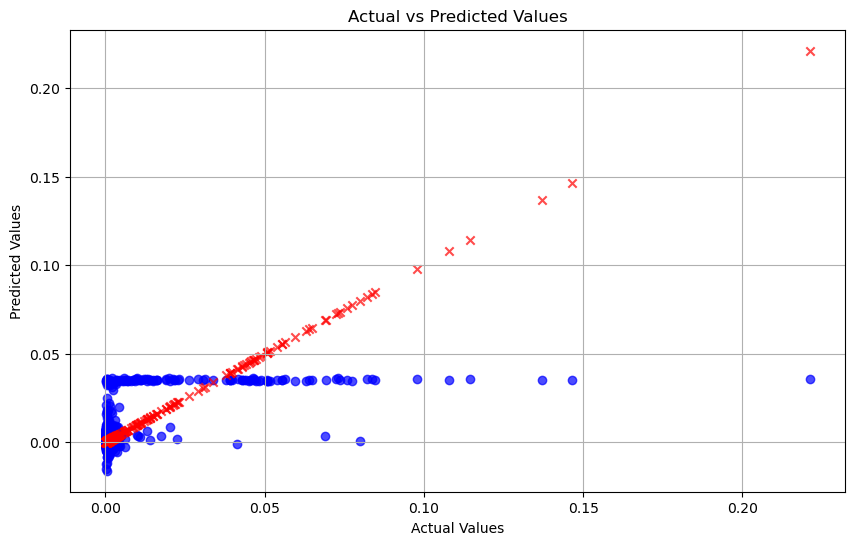

In [186]:
import matplotlib.pyplot as plt

# Actual values from the DataFrame
actual_values = y_test # Replace 'actual_values' with the actual column name

# Predicted values from the DataFrame
predicted_values = y_pred_linear  # Replace 'predicted_values' with the actual column name

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.7, label='Predicted Values', marker='o')
plt.scatter(actual_values, actual_values, color='red', alpha=0.7, label='Actual Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()



In [187]:
svr_linear = SVR(kernel='linear', C=1.0, epsilon=0.1)
svr_rbf = SVR(kernel='rbf', C=1.0, epsilon=0.1)
svr_poly = SVR(kernel='poly', degree=3, C=1.0, epsilon=0.1)
svr_sigmoid = SVR(kernel='sigmoid', C=1.0, epsilon=0.1)

In [188]:
svr_linear.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)
svr_sigmoid.fit(X_train_scaled, y_train)

SVR(kernel='sigmoid')

In [189]:
y_pred_linear = svr_linear.predict(X_test_scaled)
y_pred_rbf = svr_rbf.predict(X_test_scaled)
y_pred_poly = svr_poly.predict(X_test_scaled)
y_pred_sigmoid = svr_sigmoid.predict(X_test_scaled)

In [190]:
mse_linear = np.mean((y_pred_linear - y_test) ** 2)
mse_linear

0.009410404543175958

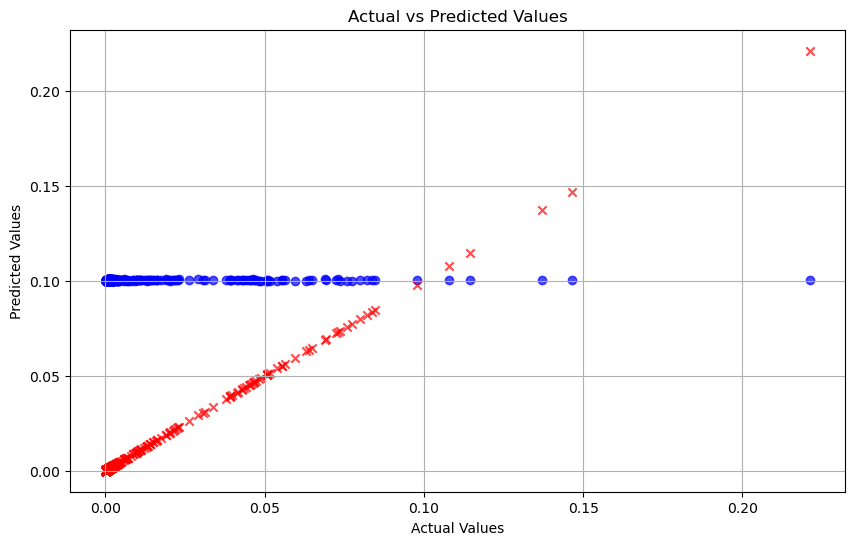

In [198]:
import matplotlib.pyplot as plt

# Actual values from the DataFrame
actual_values = y_test # Replace 'actual_values' with the actual column name

# Predicted values from the DataFrame
predicted_values = y_pred_linear  # Replace 'predicted_values' with the actual column name

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.7, label='Predicted Values', marker='o')
plt.scatter(actual_values, actual_values, color='red', alpha=0.7, label='Actual Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [191]:
mse_rbf = np.mean((y_pred_rbf - y_test) ** 2)
mse_rbf

0.008368214015871695

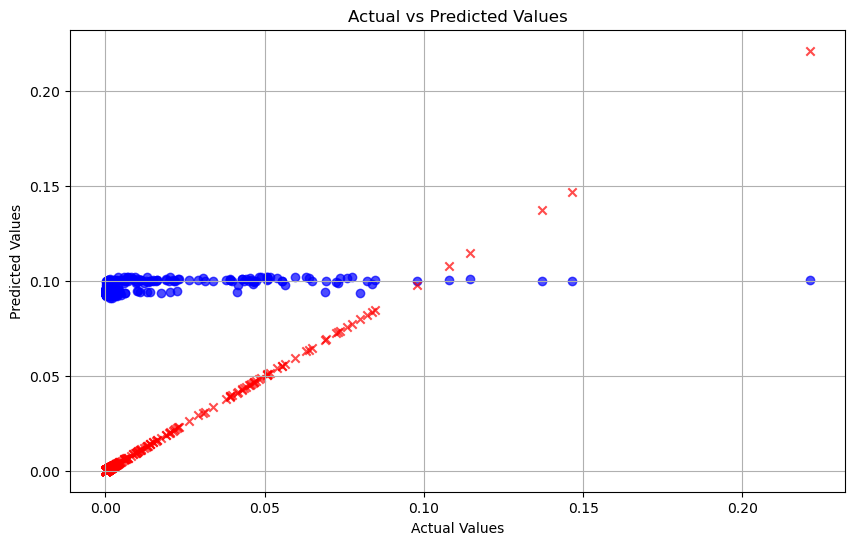

In [197]:
import matplotlib.pyplot as plt

# Actual values from the DataFrame
actual_values = y_test # Replace 'actual_values' with the actual column name

# Predicted values from the DataFrame
predicted_values = y_pred_rbf # Replace 'predicted_values' with the actual column name

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.7, label='Predicted Values', marker='o')
plt.scatter(actual_values, actual_values, color='red', alpha=0.7, label='Actual Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [192]:
mse_poly = np.mean((y_pred_poly - y_test) ** 2)
mse_poly

0.00933770868421602

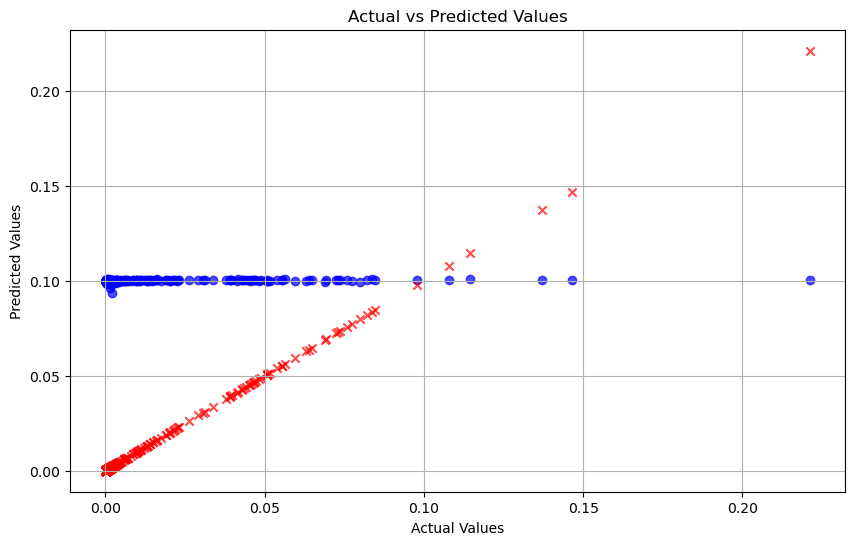

In [195]:
import matplotlib.pyplot as plt

# Actual values from the DataFrame
actual_values = y_test # Replace 'actual_values' with the actual column name

# Predicted values from the DataFrame
predicted_values = y_pred_poly # Replace 'predicted_values' with the actual column name

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.7, label='Predicted Values', marker='o')
plt.scatter(actual_values, actual_values, color='red', alpha=0.7, label='Actual Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

In [193]:
mse_sigmoid = np.mean((y_pred_sigmoid - y_test) ** 2)
mse_sigmoid

140.97011668706426

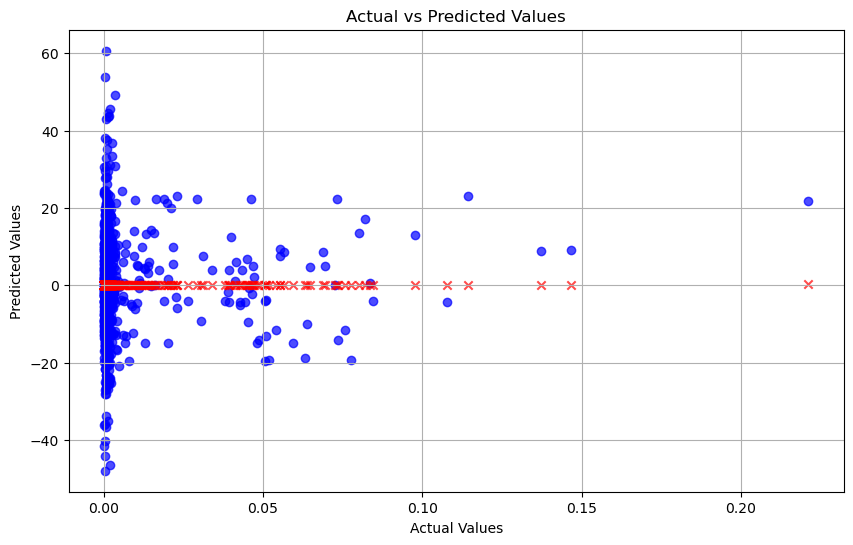

In [194]:
import matplotlib.pyplot as plt

# Actual values from the DataFrame
actual_values = y_test # Replace 'actual_values' with the actual column name

# Predicted values from the DataFrame
predicted_values = y_pred_sigmoid  # Replace 'predicted_values' with the actual column name

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(actual_values, predicted_values, color='blue', alpha=0.7, label='Predicted Values', marker='o')
plt.scatter(actual_values, actual_values, color='red', alpha=0.7, label='Actual Values', marker='x')
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()